## Indian Startup Funding

#### Hypothesis
Null Hypothesis, H0 = Null hypothesis-Investors interest in startups are directly correlated with the startup industry

Alternate Hypothesis, H1 = Investors interest in startups are independent of startup industry

In [ ]:
# Test


#### Questions

###### Top 10 Sectors for Startups
###### Top 10 Cities for Startups
###### Top 10 Most Active Investors

Which company has the highest amount of funds?
Which location has the minimum startup funds? 
In which sector has the top 10 investors.
How much did the investors contributed in Delhi and Mumbai?
How many companies received an amount greater than or equal to the average amount?

Which startup industry/sector attracts more investors?
Does investment amount correlate with the age of the startups?
Does the location of the startup affects investors interest in investing?
Which funding year saw investors investing more into startups?
Which stage of funding receives the most funding?
Is there a relationship between investor amount, location of startup and industry of startup?

In [50]:
! pip install --upgrade scipy scikit-learn


     -------------------------------------- 60.6/60.6 kB 357.0 kB/s eta 0:00:00
   ---------------------------------------- 46.2/46.2 MB 8.7 MB/s eta 0:00:00
   ---------------------------------------- 11.0/11.0 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\user\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\\localcache\\local-packages\\python310\\site-packages\\scipy-1.9.3-cp310-cp310-win_amd64.whl'



In [2]:
! pip install numpy

In [3]:
# Import necessary libraries

# For data handling
import pandas as pd
import re
import numpy as np
from functools import reduce
from sklearn.impute import SimpleImputer

# For data visualization
import matplotlib.pyplot as plt
# import matplotlib as plt
import seaborn as sns


##### Load datasets

In [4]:
# Load datasets
df_2018 = pd.read_csv(r"C:\Users\USER\Desktop\Indian StartUp\startup_funding2018.csv")
df_2019 = pd.read_csv(r"C:\Users\USER\Desktop\Indian StartUp\startup_funding2019.csv")
df_2020 = pd.read_csv(r"C:\Users\USER\Desktop\Indian StartUp\startup_funding2020.csv")
df_2021 = pd.read_csv(r"C:\Users\USER\Desktop\Indian StartUp\startup_funding2021.csv")


##### Datasets Overviews

In [5]:
#
df_2018.shape, df_2019.shape, df_2020.shape, df_2021.shape

((526, 6), (89, 9), (1055, 10), (1209, 9))

In [6]:
# summary of the dataframe, including the column names, index dtype,  non-null values, and memory usage
# seful for understanding the structure of your dataset and identifying any potential issues such as missing values or incorrect data types. 
df_2018.info(), df_2019.info(), df_2020.info(), df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($

(None, None, None, None)

##### From the above, we see that :
###### df_2018- no missing values
###### df_2019- missing values in 5 columns-   'Founded', 'HeadQuarter', 'Sector', 'Founders', 'Stage'
###### df_2020- missing values in 8 columns- 'Founded', 'HeadQuarter', 'Sector', 'Founders', 'Investor', 'Amount', 'Stage', 'column10'
###### df_2021- missing values in 6 columns- 'Founded', 'HeadQuarter', 'Founders', 'Investor', 'Amount', 'Stage'

##### We also notice that;
###### df_2018 is unique column names from the others; should be renamed
###### column10 in df_2020 is an outlier; should be removed
###### the 'amount' column has a different datatype for each dataset

In [7]:
# find the number of missing values
# df_2018 has no missing values
df_2019.isna().sum(), df_2020.isna().sum(), df_2021.isna().sum()

(Company/Brand     0
 Founded          29
 HeadQuarter      19
 Sector            5
 What it does      0
 Founders          3
 Investor          0
 Amount($)         0
 Stage            46
 dtype: int64,
 Company_Brand       0
 Founded           213
 HeadQuarter        94
 Sector             13
 What_it_does        0
 Founders           12
 Investor           38
 Amount            254
 Stage             464
 column10         1053
 dtype: int64,
 Company_Brand      0
 Founded            1
 HeadQuarter        1
 Sector             0
 What_it_does       0
 Founders           4
 Investor          62
 Amount             3
 Stage            428
 dtype: int64)

In [8]:
# Find duplicates
df_2018.duplicated().sum(), df_2019.duplicated().sum(), df_2020.duplicated().sum(), df_2021.duplicated().sum()

(1, 0, 3, 19)

#### Data Cleaning

In [9]:
# Rename df_2018 column names to be similar to the other datasets
df_2018.rename(columns = {"Company Name":"Company/Brand", "Industry":"Sector", "Location":"HeadQuarter", "About Company":"What it does", "Round/Series":"Stage"}, inplace=True)
df_2018


,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [10]:
# remove "column10" from df_2020

df_2020 = df_2020.drop(columns="column10")
df_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,NaN
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C


In [11]:
# rename "Amount($)" column to Amount in df_2019
df_2019.rename(columns = {"Amount($)":"Amount"}, inplace=True)
df_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [12]:
# Look at 'Amount' column in all datasets
df_2018.Amount, df_2019.Amount, df_2020.Amount, df_2021.Amount

(0           250000
 1      ₹40,000,000
 2      ₹65,000,000
 3          2000000
 4                —
           ...     
 521      225000000
 522              —
 523           7500
 524    ₹35,000,000
 525       35000000
 Name: Amount, Length: 526, dtype: object,
 0       $6,300,000
 1     $150,000,000
 2      $28,000,000
 3      $30,000,000
 4       $6,000,000
           ...     
 84     $20,000,000
 85    $693,000,000
 86      $5,000,000
 87     $50,000,000
 88     $33,000,000
 Name: Amount, Length: 89, dtype: object,
 0         200000.0
 1         100000.0
 2              NaN
 3         400000.0
 4         340000.0
            ...    
 1050     1500000.0
 1051    13200000.0
 1052     8000000.0
 1053     8043000.0
 1054     9000000.0
 Name: Amount, Length: 1055, dtype: float64,
 0         $1,200,000
 1       $120,000,000
 2        $30,000,000
 3        $51,000,000
 4         $2,000,000
             ...     
 1204        $3000000
 1205       $20000000
 1206       $55000000
 1207       

In [13]:
# Clean the "Amount" column
# # Create a function to remove symbols and convert amounts to numeric values.

def clean_amount(amount, currency='dollar'):
    # Remove currency symbols and commas
    if isinstance(amount, str):
        amount = re.sub(r'[^\d.]', '', amount)
        amount = amount.replace(',', '')
    # Convert to float
    try:
        amount = float(amount)
    except ValueError:
        amount = np.nan
    
    # Convert rupees to dollars (assuming a conversion rate, e.g., 1 INR = 0.013 USD)
    if currency == 'rupee':
        amount *= 0.013
    
    return amount


In [14]:
# Apply the cleaning function to each DataFrame
df_2018['Amount'] = df_2018['Amount'].apply(lambda x: clean_amount(x, currency='₹'))
df_2019['Amount'] = df_2019['Amount'].apply(lambda x: clean_amount(x, currency='$'))
df_2020['Amount'] = df_2020['Amount'].apply(lambda x: clean_amount(x, currency='$'))  # No currency symbol
df_2021['Amount'] = df_2021['Amount'].apply(lambda x: clean_amount(x, currency='$'))



In [15]:
# Check the first few rows of each DataFrame to ensure the "Amount" column has been cleaned and converted correctly.

print(df_2018.Amount)
print(df_2019.Amount)
print(df_2020.Amount)
print(df_2021.Amount)


0         250000.0
1       40000000.0
2       65000000.0
3        2000000.0
4              NaN
          ...     
521    225000000.0
522            NaN
523         7500.0
524     35000000.0
525     35000000.0
Name: Amount, Length: 526, dtype: float64
0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount, Length: 89, dtype: float64
0         200000.0
1         100000.0
2              NaN
3         400000.0
4         340000.0
           ...    
1050     1500000.0
1051    13200000.0
1052     8000000.0
1053     8043000.0
1054     9000000.0
Name: Amount, Length: 1055, dtype: float64
0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount, Length: 1209, dtype: flo

In [16]:
# Handling duplicates

# Remove duplicates
df_2018 = df_2018.drop_duplicates()
df_2019 = df_2019.drop_duplicates()
df_2020 = df_2020.drop_duplicates()
df_2021 = df_2021.drop_duplicates()

In [17]:
#
# Confirm the duplicates are removed
df_2018.duplicated().sum(), df_2019.duplicated().sum(), df_2020.duplicated().sum(), df_2021.duplicated().sum()

(0, 0, 0, 0)

In [18]:
# Handling missing values

# find the number of missing values
df_2018.isna().sum(), df_2019.isna().sum(), df_2020.isna().sum(), df_2021.isna().sum()


(Company/Brand      0
 Sector             0
 Stage              0
 Amount           148
 HeadQuarter        0
 What it does       0
 dtype: int64,
 Company/Brand     0
 Founded          29
 HeadQuarter      19
 Sector            5
 What it does      0
 Founders          3
 Investor          0
 Amount           12
 Stage            46
 dtype: int64,
 Company_Brand      0
 Founded          213
 HeadQuarter       94
 Sector            13
 What_it_does       0
 Founders          12
 Investor          38
 Amount           253
 Stage            462
 dtype: int64,
 Company_Brand      0
 Founded            1
 HeadQuarter        1
 Sector             0
 What_it_does       0
 Founders           4
 Investor          61
 Amount           150
 Stage            421
 dtype: int64)

In [19]:
# Handling missing values

# Handle missing values for df_2018
df_2018['Amount'].fillna(df_2018['Amount'].median(), inplace=True)

# Handle missing values for df_2019
df_2019['Founded'].fillna(df_2019['Founded'].mode()[0], inplace=True)
df_2019['HeadQuarter'].fillna('Unknown', inplace=True)
df_2019['Sector'].fillna('Unknown', inplace=True)
df_2019['Amount'].fillna(df_2019['Amount'].median(), inplace=True)
df_2019['Stage'].fillna('Unknown', inplace=True)
df_2019['Founders'].fillna('Unknown', inplace=True)
df_2019['Investor'].fillna('Unknown', inplace=True)

# Handle missing values for df_2020
df_2020['Founded'].fillna(df_2020['Founded'].mode()[0], inplace=True)
df_2020['HeadQuarter'].fillna('Unknown', inplace=True)
df_2020['Sector'].fillna('Unknown', inplace=True)
df_2020['Amount'].fillna(df_2020['Amount'].median(), inplace=True)
df_2020['Stage'].fillna('Unknown', inplace=True)
df_2020['Founders'].fillna('Unknown', inplace=True)
df_2020['Investor'].fillna('Unknown', inplace=True)

# Handle missing values for df_2021
df_2021['Founded'].fillna(df_2021['Founded'].mode()[0], inplace=True)
df_2021['HeadQuarter'].fillna('Unknown', inplace=True)
df_2021['Sector'].fillna('Unknown', inplace=True)
df_2021['Amount'].fillna(df_2021['Amount'].median(), inplace=True)
df_2021['Stage'].fillna('Unknown', inplace=True)
df_2021['Founders'].fillna('Unknown', inplace=True)
df_2021['Investor'].fillna('Unknown', inplace=True)

# Verify the imputation for all DataFrames
print("Missing values in df_2018 after handling:", df_2018.isnull().sum())
print("Missing values in df_2019 after handling:", df_2019.isnull().sum())
print("Missing values in df_2020 after handling:", df_2020.isnull().sum())
print("Missing values in df_2021 after handling:", df_2021.isnull().sum())


Missing values in df_2018 after handling: Company/Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What it does     0
dtype: int64
Missing values in df_2019 after handling: Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64
Missing values in df_2020 after handling: Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64
Missing values in df_2021 after handling: Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_9012\1102958707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Amount'].fillna(df_2018['Amount'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9012\1102958707.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Founded'].fillna(df_2020['Founded'].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9012\1102958707.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [20]:
df_2018.HeadQuarter

0           Bangalore, Karnataka, India
1            Mumbai, Maharashtra, India
2               Gurgaon, Haryana, India
3           Noida, Uttar Pradesh, India
4      Hyderabad, Andhra Pradesh, India
                     ...               
521         Bangalore, Karnataka, India
522             Haryana, Haryana, India
523          Mumbai, Maharashtra, India
524          Mumbai, Maharashtra, India
525          Chennai, Tamil Nadu, India
Name: HeadQuarter, Length: 525, dtype: object

In [21]:
# Clean the HeadQuarter  column in df_2018 to only retain the first part
df_2018['HeadQuarter'] = df_2018['HeadQuarter'].apply(lambda x: x.split(',')[0].strip())

# Display cleaned HeadQuarter column
print("Cleaned HeadQuarter column:")
print(df_2018['HeadQuarter'].head())


Cleaned HeadQuarter column:
0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
Name: HeadQuarter, dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_9012\3438714681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['HeadQuarter'] = df_2018['HeadQuarter'].apply(lambda x: x.split(',')[0].strip())


In [22]:
# Verify the changes
df_2018.HeadQuarter

0      Bangalore
1         Mumbai
2        Gurgaon
3          Noida
4      Hyderabad
         ...    
521    Bangalore
522      Haryana
523       Mumbai
524       Mumbai
525      Chennai
Name: HeadQuarter, Length: 525, dtype: object

In [23]:
# Add missing columns in df_2018 and fill them with NAN

df_2018["Founded"] = np.nan
df_2018["Founders"] = np.nan
df_2018["Investor"] = np.nan

C:\Users\USER\AppData\Local\Temp\ipykernel_9012\364423210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018["Founded"] = np.nan
C:\Users\USER\AppData\Local\Temp\ipykernel_9012\364423210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018["Founders"] = np.nan
C:\Users\USER\AppData\Local\Temp\ipykernel_9012\364423210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [24]:
# verify the changes
df_2018

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,40000000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,65000000.0,Gurgaon,Leading Online Loans Marketplace in India,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,6000000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",NaN,NaN,NaN
522,Happyeasygo Group,"Tourism, Travel",Series A,6000000.0,Haryana,HappyEasyGo is an online travel domain.,NaN,NaN,NaN
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,NaN,NaN,NaN
524,Droni Tech,Information Technology,Seed,35000000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,NaN


In [25]:
df_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [26]:
# Rename df_2018 and df_2019 columns; Company/Brand and  What it does to be similar to the other datasets
df_2018.rename(columns = {"Company/Brand":"Company_Brand","What it does":"What_it_does"}, inplace=True)
df_2018

df_2019.rename(columns = {"Company/Brand":"Company_Brand","What it does":"What_it_does"}, inplace=True)
df_2019

C:\Users\USER\AppData\Local\Temp\ipykernel_9012\775542054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018.rename(columns = {"Company/Brand":"Company_Brand","What it does":"What_it_does"}, inplace=True)


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,2015.0,Unknown,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,Unknown
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,2015.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,Unknown
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,2015.0,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,Unknown
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,Unknown


#### Merge datasets

In [27]:
df = pd.concat([df_2018, df_2019, df_2020, df_2021])
df

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,40000000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,65000000.0,Gurgaon,Leading Online Loans Marketplace in India,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,6000000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


##### Dataset Overview

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2856 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2856 non-null   object 
 1   Sector         2856 non-null   object 
 2   Stage          2856 non-null   object 
 3   Amount         2856 non-null   float64
 4   HeadQuarter    2856 non-null   object 
 5   What_it_does   2856 non-null   object 
 6   Founded        2331 non-null   float64
 7   Founders       2331 non-null   object 
 8   Investor       2331 non-null   object 
dtypes: float64(2), object(7)
memory usage: 223.1+ KB


In [29]:
# Check missing values
df.isna().sum()

Company_Brand      0
Sector             0
Stage              0
Amount             0
HeadQuarter        0
What_it_does       0
Founded          525
Founders         525
Investor         525
dtype: int64

In [30]:
# Using the simpleImputer to replace NaN values
def replacer(Strategy,column):
    imputer = SimpleImputer(strategy =Strategy, missing_values = np.NaN)
    imputer = imputer.fit(df[[column]])
    df[column] = imputer.transform(df[[column]])
replacer('mean','Amount')
replacer('most_frequent','Stage')
replacer('most_frequent','HeadQuarter')
replacer('most_frequent','Sector')
replacer('most_frequent','Founders')
replacer('most_frequent','Investor')
replacer('most_frequent','Founded')


In [31]:
# verify the changes
df.isna().sum()

Company_Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What_it_does     0
Founded          0
Founders         0
Investor         0
dtype: int64

In [32]:
#
df.duplicated().sum()

0

In [33]:
#
df.shape

(2856, 9)

#### Data visualization

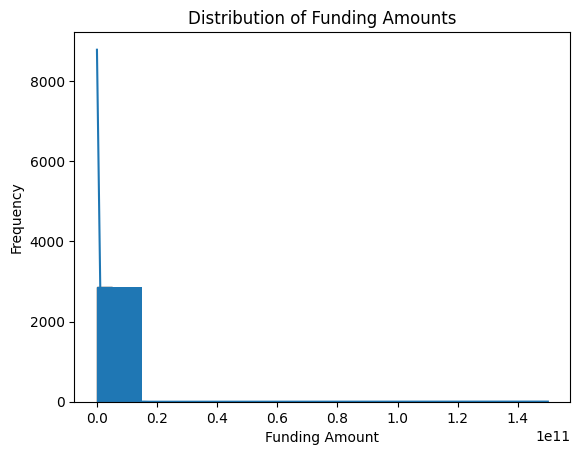

In [34]:
# Histogram for Distribution of Funding Amounts
# plt.figure(figsize=(6, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount')
plt.ylabel('Frequency')

plt.hist(df.Amount)
plt.show()

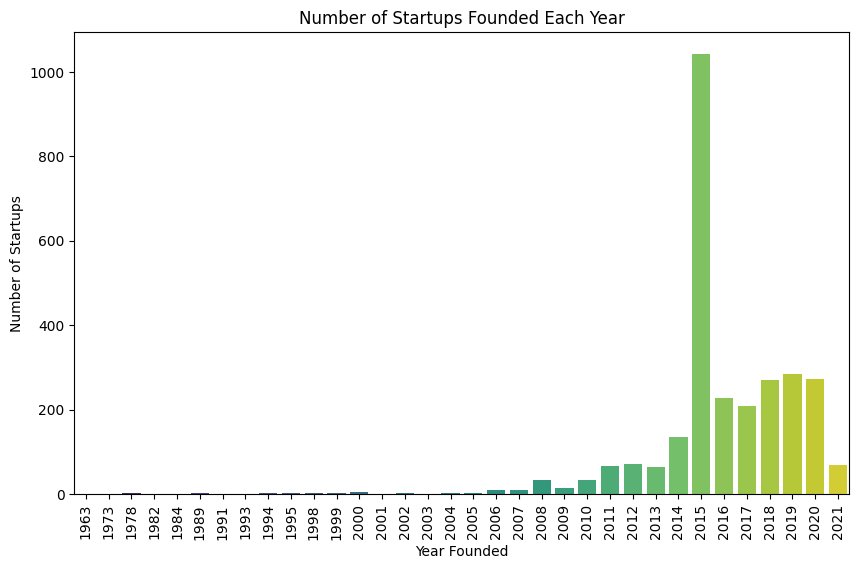

In [35]:
# Assuming you have a 'Founded' column with the year the startup was founded

# Number of Startups Founded Each Year
plt.figure(figsize=(10, 6))
df['Founded'] = df['Founded'].fillna(0).astype(int)  # Fill missing values for the purpose of visualization
sns.countplot(x='Founded', data=df, palette='viridis')
plt.title('Number of Startups Founded Each Year')
plt.xlabel('Year Founded')
plt.ylabel('Number of Startups')
plt.xticks(rotation=90)
plt.show()


In [43]:
df.columns

Index(['Company_Brand', 'Sector', 'Stage', 'Amount', 'HeadQuarter',
       'What_it_does', 'Founded', 'Founders', 'Investor'],
      dtype='object')

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


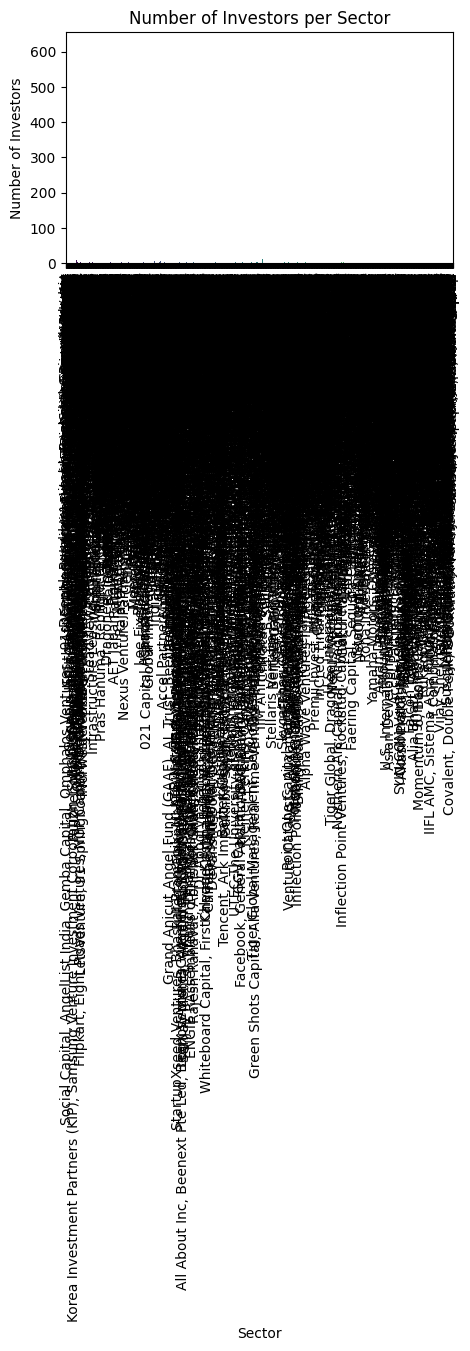

In [42]:
# Number of Investors per Sector 
plt.figure(figsize=(5, 3))
df['Investor'] = df['Investor']  # .fillna(0)  # .astype(int)  # Fill missing values for the purpose of visualization
sns.countplot(x='Investor', data=df, palette='viridis')
plt.title('Number of Investors per Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Investors')
plt.xticks(rotation=90)
plt.show()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


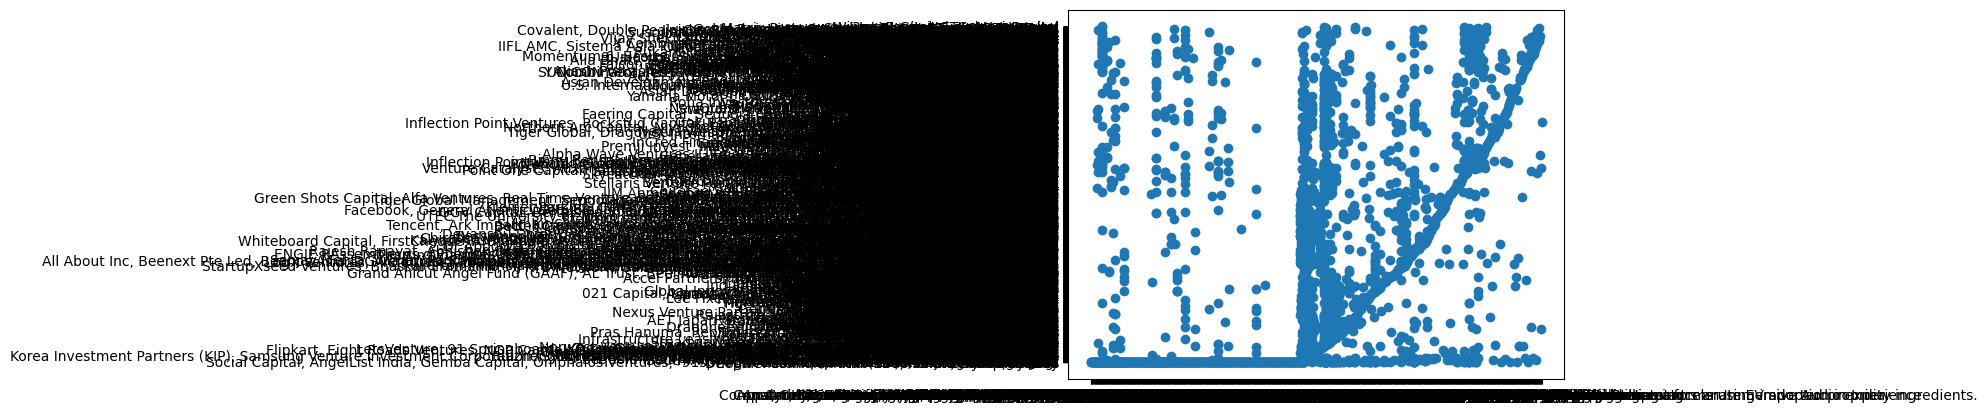

In [50]:
# Investor and  Sector
plt.scatter(df.Sector, df.Investor)
plt.show()

In [51]:
# 
# # Number of Investors per Sector 
# plt.figure(figsize=(10, 6))
# df['Investor'] = df['Investor']  # .fillna(0)  # .astype(int)  # Fill missing values for the purpose of visualization
# sns.countplot(x='Investor', data=df, palette='viridis')
# plt.title('Number of Investors per Sector')
# plt.xlabel('Sector')
# plt.ylabel('Number of Investors')
# plt.xticks(rotation=90)
# plt.show()

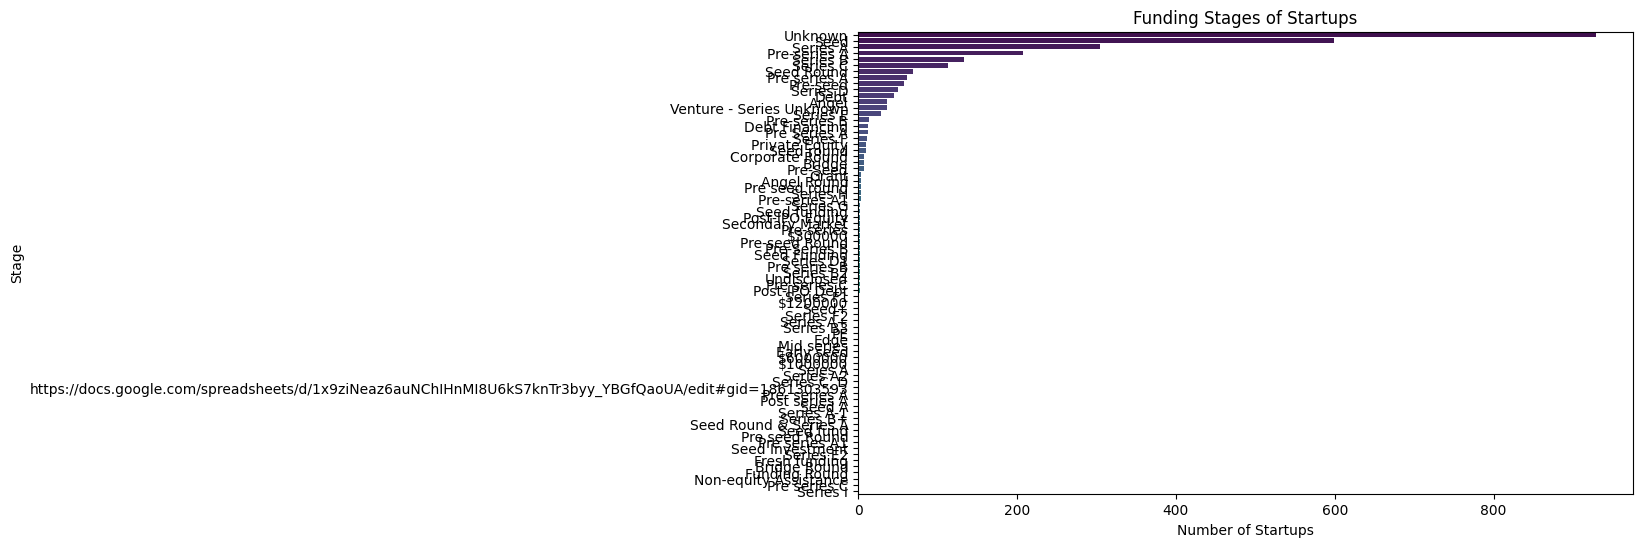

In [37]:
# Funding Stages of Startups
plt.figure(figsize=(10, 6))
sns.countplot(y='Stage', data=df, order=df['Stage'].value_counts().index, palette='viridis')
plt.title('Funding Stages of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Stage')
plt.show()

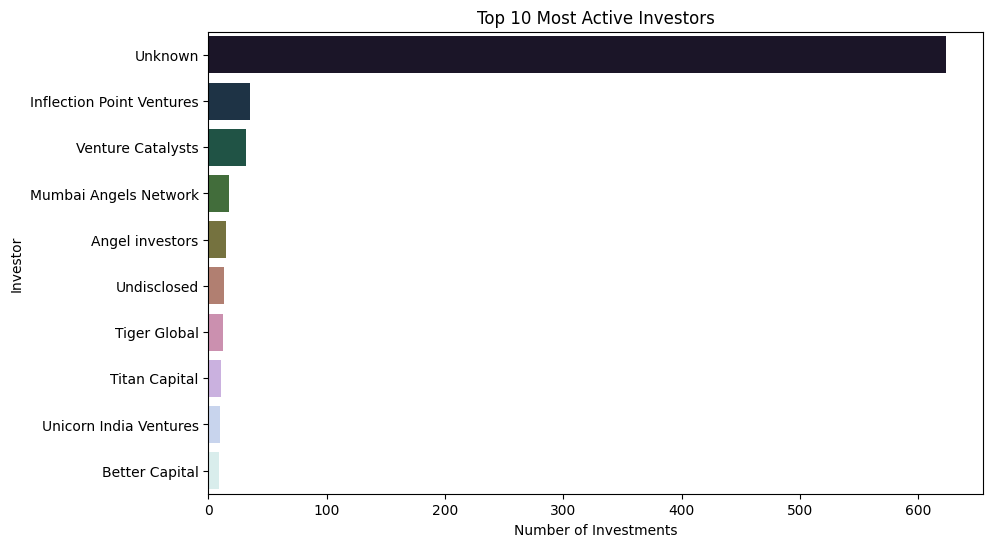

In [38]:
# Most Active Investors
plt.figure(figsize=(10, 6))
top_investors = df['Investor'].value_counts().head(10)
sns.barplot(x=top_investors.values, y=top_investors.index, palette='cubehelix')
plt.title('Top 10 Most Active Investors')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.show()

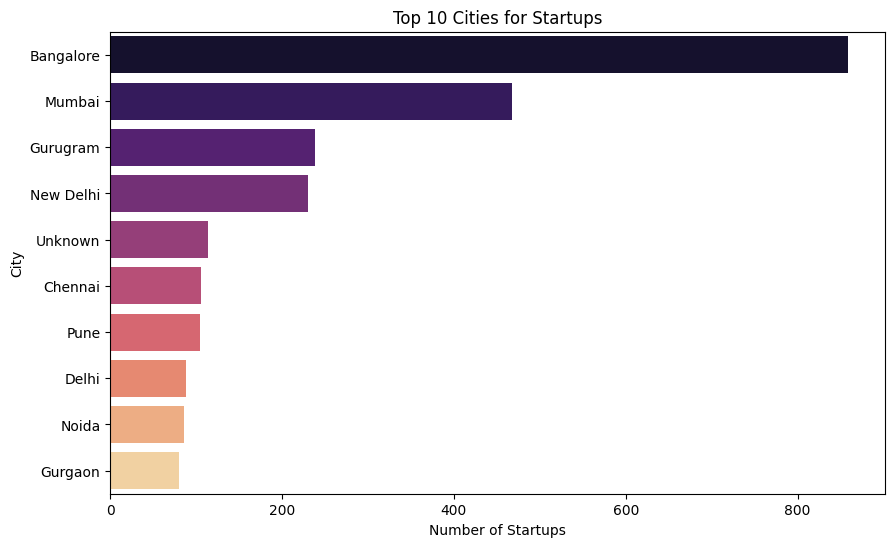

In [39]:
# Geographical Distribution of Startups
plt.figure(figsize=(10, 6))
top_cities = df['HeadQuarter'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title('Top 10 Cities for Startups')
plt.xlabel('Number of Startups')
plt.ylabel('City')
plt.show()

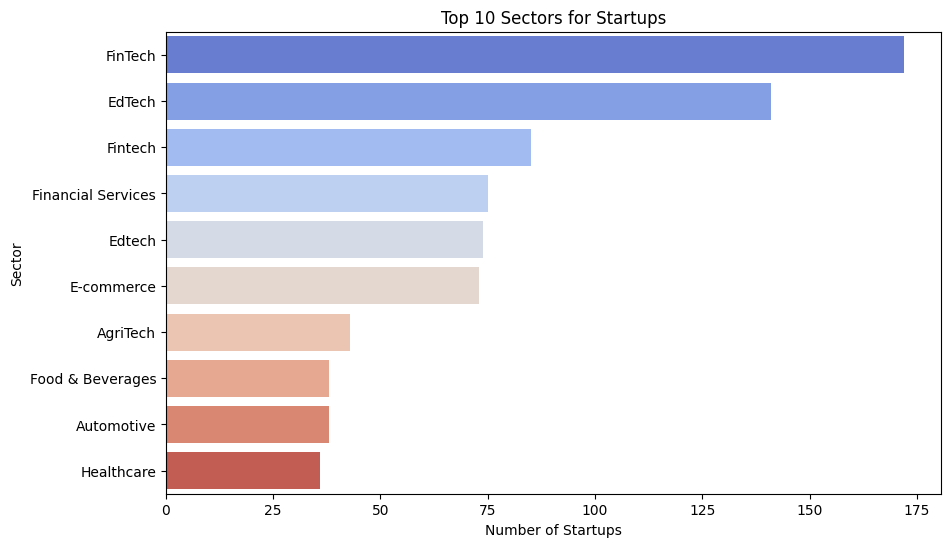

In [40]:
# Top Sectors for Startups
plt.figure(figsize=(10, 6))
top_sectors = df['Sector'].value_counts().head(10)
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='coolwarm')
plt.title('Top 10 Sectors for Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Sector')
plt.show()


#### Save df to a csv file

In [43]:
# Save the DataFrame to a CSV file
df.to_csv('merged_df.csv', index=False)